In [1]:
import json

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
from matplotlib.patches import Arc

import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns

%matplotlib inline

with open (r"YOUR FILEPATH\data\matches\37\42.json", "r") as f:

                obj = json.load(f)




mlist = []

objlist = []

dflist = []

for match in obj:

                mid = match["match_id"]

                mlist.append(mid)




mlist = [str(m) for m in mlist]

mlist = [m+".json" for m in mlist]




for n in mlist:

                file = r"YOUR FILEPATH/data/events/" + "/" + n

                with open (file, "r", encoding="utf-8") as f:

                                obj = json.load(f)

                                objlist.append(obj)

for obj in objlist:

    df = json_normalize(obj)

    dflist.append(df)

result = pd.concat(dflist, sort=True)
result

C:\Users\philipp.hollenhorst\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,50_50.outcome.id,50_50.outcome.name,bad_behaviour.card.id,bad_behaviour.card.name,ball_receipt.outcome.id,ball_receipt.outcome.name,ball_recovery.offensive,ball_recovery.recovery_failure,block.deflection,block.offensive,block.save_block,carry.end_location,clearance.aerial_won,clearance.body_part.id,clearance.body_part.name,clearance.head,clearance.left_foot,clearance.other,clearance.right_foot,counterpress,dribble.no_touch,dribble.nutmeg,dribble.outcome.id,dribble.outcome.name,dribble.overrun,duel.outcome.id,duel.outcome.name,duel.type.id,duel.type.name,duration,foul_committed.advantage,foul_committed.card.id,foul_committed.card.name,foul_committed.offensive,foul_committed.penalty,foul_committed.type.id,foul_committed.type.name,foul_won.advantage,foul_won.defensive,foul_won.penalty,goalkeeper.body_part.id,goalkeeper.body_part.name,goalkeeper.end_location,goalkeeper.lost_in_play,goalkeeper.outcome.id,goalkeeper.outcome.name,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.punched_out,goalkeeper.saved_to_post,goalkeeper.shot_saved_off_target,goalkeeper.shot_saved_to_post,goalkeeper.success_in_play,goalkeeper.technique.id,goalkeeper.technique.name,goalkeeper.type.id,goalkeeper.type.name,half_end.early_video_end,half_start.late_video_start,id,index,injury_stoppage.in_chain,interception.outcome.id,interception.outcome.name,location,minute,miscontrol.aerial_won,off_camera,out,pass.aerial_won,pass.angle,pass.assisted_shot_id,pass.body_part.id,pass.body_part.name,pass.cross,pass.cut_back,pass.deflected,pass.end_location,pass.goal_assist,pass.height.id,pass.height.name,pass.inswinging,pass.length,pass.miscommunication,pass.no_touch,pass.outcome.id,pass.outcome.name,pass.outswinging,pass.recipient.id,pass.recipient.name,pass.shot_assist,pass.straight,pass.switch,pass.technique.id,pass.technique.name,pass.through_ball,pass.type.id,pass.type.name,period,play_pattern.id,play_pattern.name,player.id,player.name,position.id,position.name,possession,possession_team.id,possession_team.name,related_events,second,shot.aerial_won,shot.body_part.id,shot.body_part.name,shot.deflected,shot.end_location,shot.first_time,shot.follows_dribble,shot.freeze_frame,shot.key_pass_id,shot.one_on_one,shot.open_goal,shot.outcome.id,shot.outcome.name,shot.redirect,shot.saved_off_target,shot.saved_to_post,shot.statsbomb_xg,shot.technique.id,shot.technique.name,shot.type.id,shot.type.name,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,tactics.formation,tactics.lineup,team.id,team.name,timestamp,type.id,type.name,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9579b6c0-b747-4ab7-9aa4-9aff4b852827,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,Regular Play,NaN,NaN,NaN,NaN,1,974,Reading WFC,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41212.0,"[{'player': {'id': 33664, 'name': 'Rachael Law...",974,Reading WFC,00:00:00.000,35,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a4a12e95-b01a-4042-879f-45c3d992e969,2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,Regular Play,NaN,NaN,NaN,NaN,1,974,Reading WFC,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4231.0,"[{'player': {'id': 22027, 'name': 'Anne Moorho...",972,West Ham United LFC,00:00:00.000,35,Starting XI,NaN
2,

In [14]:
def xAMap (result, Player):
    df1 = result[result["type.name"]=="Pass"]
    df2 = df1[df1["pass.shot_assist"]==True][["player.name","team.name","position.name", "location","pass.end_location","pass.assisted_shot_id","pass.angle",
                                                 "pass.body_part.name","pass.cross","pass.cut_back","pass.height.name","pass.length",
                                                 "pass.technique.name","pass.type.name"]]
    
    df2a = df1[df1["pass.goal_assist"]==True][["player.name","team.name","position.name", "location","pass.end_location","pass.assisted_shot_id","pass.angle",
                                             "pass.body_part.name","pass.cross","pass.cut_back","pass.height.name","pass.length","pass.technique.name","pass.type.name"]]

    df2 = pd.concat([df2,df2a])
    df2 = df2.reset_index(drop=True)

    for i in df2["pass.assisted_shot_id"]:
        df2 = df2.append(result[result["id"]==i][["shot.statsbomb_xg"]])
    df2
    A = int(len(df2)/2)
    A
    df3 = df2.iloc[A:len(df2)]
    df4 = df2.iloc[0:A]
    df3 =df3.reset_index()
    df4 = df4.reset_index()
    df4 = df4.drop(columns=["shot.statsbomb_xg"])
    df6 = pd.concat([df3["shot.statsbomb_xg"],df4], axis=1)
    loc = pd.DataFrame(df6["location"].values.tolist(), columns=["x","y"])
    endloc = pd.DataFrame(df6["pass.end_location"].values.tolist(), columns=["endx","endy"])
    df6 = df6.drop(columns=["location","pass.end_location"])
    df7 = pd.concat([loc,endloc,df6],axis=1)
    df8 = df7[df7["player.name"]==Player]
    df8 = df8.reset_index(drop=True)


    fig,ax2 = plt.subplots(figsize=(12.4,6.8),facecolor="#3B3736")
        #ax2 = plt.axes([0, 0, 1.5, 0.5])
        #fig.figsize(6.8,10.4)
    ax2.axis('off')
    



                    ### TOP ###
    vcx1 = [0,0,68,68,0]            # sidelines
    vcy1 = [0,104,104,0,0]

    vcx2 = [13.84,13.84,54.16,54.16] # outer box
    vcy2 = [104,87.5,87.5,104]

    vcx3 = [30.34,30.34,37.66,37.66] # goal
    vcy3 = [104,104.2,104.2,104]

    vcx4 = [24.84,24.84,43.16,43.16] # 6-y box
    vcy4 = [104,99.5,99.5,104]

    vcx5 = [0,68] # Half-way-line
    vcy5 = [52,52]


                    ### BOTTOM ###

    vcx6 = [13.84,13.84,54.16,54.16] # outer box
    vcy6 = [0,16.5,16.5,0]

    vcx7 = [30.34,30.34,37.66,37.66] # goal
    vcy7 = [0,-0.2,-0.2,0]
    vcx8 = [24.84,24.84,43.16,43.16] # 6-y box
    vcy8 = [0,4.5,4.5,0]


        #CENTRE CIRCLE

    circle3 = plt.Circle((34, 52), 9.15,ls='solid',lw=1.5,color="white", fill=False, zorder=1,alpha=1)


        ###### BOX #######
    plt.plot(vcx1,vcy1,c="white",zorder=5)
    plt.plot(vcx2,vcy2,c="white",zorder=5)
    plt.plot(vcx3,vcy3,c="white",zorder=5)
    plt.plot(vcx4,vcy4,c="white",zorder=5)
    plt.plot(vcx5,vcy5,c="white",zorder=5)
    plt.plot(vcx6,vcy6,c="white",zorder=5)
    plt.plot(vcx7,vcy7,c="white",zorder=5)
    plt.plot(vcx8,vcy8,c="white",zorder=5)

    plt.scatter(34,93,c="white",zorder=5)
    plt.scatter(34,11,c="white",zorder=5)
    plt.scatter(34,52,c="white",zorder=5)

    circle1 = plt.Circle((34, 93.5), 9.15,ls='solid',lw=1.5,color="white", fill=False, zorder=1,alpha=1)
    circle2 = plt.Circle((34, 10.5), 9.15,ls='solid',lw=1.5,color="white", fill=False, zorder=1,alpha=1)
    ax2.add_artist(circle1)
    ax2.add_artist(circle2)
    ax2.add_artist(circle3)
    rec1 = plt.Rectangle((20, 87.5), 30,16,ls='-',color="white", zorder=1,alpha=1)
    rec2 = plt.Rectangle((0,0),68,104,color="#3B3736",zorder=2,alpha=1)  
    rec3 = plt.Rectangle((20, 0), 30,16.5,ls='-',color="white", zorder=1,alpha=1)

    ax2.add_artist(rec1)
    ax2.add_artist(rec2)
    ax2.add_artist(rec3)

    groundpass = df8[df8["pass.height.name"]=="Ground Pass"]
    lowpass = df8[df8["pass.height.name"]=="Low Pass"]
    highpass = df8[df8["pass.height.name"]=="High Pass"]

    x = df8['x']/120 * 104
    y = df8['y']/80 * 68
    y = 68 - y
    xend = df8['endx']/120 * 104
    yend = df8['endy']/80 * 68
    yend = 68 - yend

    xgroundpass = groundpass['x']/120 * 104
    ygroundpass = groundpass['y']/80 * 68
    ygroundpass = 68 - ygroundpass
    xendgroundpass = groundpass['endx']/120 * 104
    yendgroundpass = groundpass['endy']/80 * 68
    yendgroundpass = 68 - yendgroundpass

    xlowpass = lowpass['x']/120 * 104
    ylowpass = lowpass['y']/80 * 68
    ylowpass = 68 - ylowpass
    xendlowpass = lowpass['endx']/120 * 104
    yendlowpass = lowpass['endy']/80 * 68
    yendlowpass = 68 - yendlowpass

    xhighpass = highpass['x']/120 * 104
    yhighpass = highpass['y']/80 * 68
    yhighpass = 68 - yhighpass
    xendhighpass = highpass['endx']/120 * 104
    yendhighpass = highpass['endy']/80 * 68
    yendhighpass = 68 - yhighpass

    x_size = np.array(df8["shot.statsbomb_xg"].values)
    xgroundpass_size = np.array(groundpass["shot.statsbomb_xg"].values)
    xlowpass_size = np.array(lowpass["shot.statsbomb_xg"].values)
    xhighpass_size = np.array(highpass["shot.statsbomb_xg"].values)

    plt.ylim(52,105)
    plt.xlim(0,68)

    ax2.scatter(-100,-100,marker='H',c="#BFBDB8",edgecolors='black',s=200,label='Ground Pass',alpha=0.6)
    ax2.scatter(-100,-100,marker='o',c="#BFBDB8",edgecolors='black',s=200,label='High Pass',alpha=0.6)
    #ax2.scatter(-100,-100,marker='*',c='grey',edgecolors='black',s=200,label="xA:" + " " +  str(sum(df8["shot.statsbomb_xg"])) + " | " + Player + " | " + str(df8["team.name"][0]),alpha=0.6)
    ax2.scatter(-100,-100,marker='d',c="#BFBDB8",edgecolors='black',s=200,label='Low Pass',alpha=0.6)
    #ax2.scatter(-100,-100,marker='+',c='grey',edgecolors='black',s=200,label= Player,alpha=0.6)
    ax2.legend(bbox_to_anchor=(0,-0.1,1,1),ncol=3,fontsize=14)
    ax2.text(67,53,s="xA:" + " " +  str(sum(df8["shot.statsbomb_xg"])) + " | " + Player + " | " + str(df8["team.name"][0]) + " | " + "data from StatsBomb",color="#BFBDB8", fontsize=12, fontweight="bold")
    

    

    if max(x_size) > 0.50:
        vmx = max(x_size)
    else:
        vmx = 0.50

    plt.scatter(y,x,cmap="autumn_r",c=x_size,edgecolors="black",alpha=0.5,marker='*',linewidths=1.25,zorder=5000,s=0,vmin=0.00,vmax=vmx)

    #cbar = plt.colorbar()
    #cbar.set_label("npxG", labelpad=1, fontsize=20, color="#BFBDB8")
    #cbar.ax.set_yticklabels([0,0.1,0.2,0.3,0.4,0.5],color="#BFBDB8")
    plt.colorbar(ax=ax2)

    plt.scatter(ygroundpass,xgroundpass,cmap="autumn_r",c=xgroundpass_size,edgecolors='black',alpha=0.5,marker='H',linewidths=1.25,zorder=5000,s=xgroundpass_size*1000,vmin=0.00,vmax=vmx)

    plt.scatter(ylowpass,xlowpass,cmap="autumn_r",c=xlowpass_size,edgecolors='black',alpha=0.5,marker='d',linewidths=1.25,zorder=5000,s=xlowpass_size*1000,vmin=0.00,vmax=vmx)
    plt.gca().invert_xaxis()
    plt.scatter(yhighpass,xhighpass,cmap="autumn_r",c=xhighpass_size,edgecolors='black',alpha=0.5,marker='o',linewidths=1.25,zorder=5000,s=xhighpass_size*1000,vmin=0.00,vmax=vmx)

    for i in range(len(df8)):
        plt.plot([(68-df8["y"]/80 * 68)[i],(68-df8["endy"]/80 * 68)[i]],
                [(df8["x"]/120 * 104)[i],(df8["endx"]/120 * 104)[i]], 
                color="#BFBDB8", alpha=0.6,zorder=5)
        plt.plot((68-df8["endy"]/80 * 68)[i],(df8["endx"]/120 * 104)[i],color="#BFBDB8",marker="*", alpha=0.6,zorder=5)

    
    

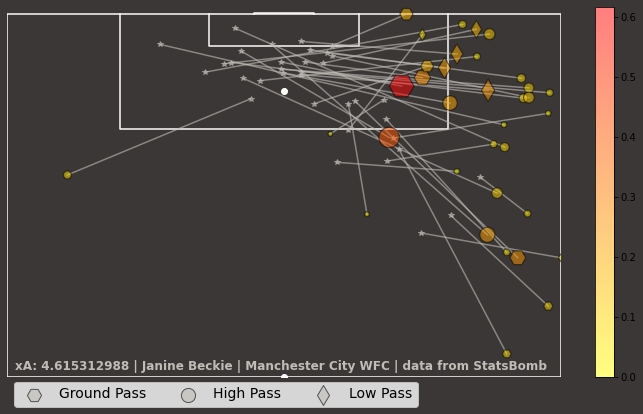

In [15]:
xAMap(result,"Janine Beckie")